In [1]:
# Core Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-learn
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.cluster import KMeans,MeanShift,estimate_bandwidth
from sklearn.decomposition import PCA
from sklearn.metrics import calinski_harabasz_score,davies_bouldin_score,silhouette_score

In [2]:
data_dir = "./data"
pd.set_option('display.max_columns', None)

df = pd.read_excel(data_dir + "./Online Retail.xlsx")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [3]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
pd.set_option('future.no_silent_downcasting', True)
# Handling missing data in "Description"
df['Description'] = df.groupby('StockCode')['Description'].transform(lambda x: x.ffill().bfill())

# Handling missing data in "CustomerID"
df['CustomerID'] = df.groupby('Country')['CustomerID'].transform(lambda x: x.ffill().bfill())

df.isna().sum()

InvoiceNo        0
StockCode        0
Description    112
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID     288
Country          0
dtype: int64

In [6]:
# Drop remaining na
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541509 entries, 0 to 541508
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541509 non-null  object        
 1   StockCode    541509 non-null  object        
 2   Description  541509 non-null  object        
 3   Quantity     541509 non-null  int64         
 4   InvoiceDate  541509 non-null  datetime64[ns]
 5   UnitPrice    541509 non-null  float64       
 6   CustomerID   541509 non-null  float64       
 7   Country      541509 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
duplicated_df = df[df.duplicated()]
print(f"Sum duplicated : {df.duplicated().sum()}")
print(duplicated_df)

Sum duplicated : 5264
       InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541275    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541289    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541292    581538     22992             REVOLVER WOODEN RULER          1   
541299    581538     22694                       WICKER STAR          1   
541301    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

               InvoiceDate  UnitPrice  CustomerID         Country  
517    20

In [9]:
# Handling duplicated data
df = df.drop_duplicates()

print(f"Sum duplicated : {df.duplicated().sum()}")

Sum duplicated : 0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536245 entries, 0 to 541508
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536245 non-null  object        
 1   StockCode    536245 non-null  object        
 2   Description  536245 non-null  object        
 3   Quantity     536245 non-null  int64         
 4   InvoiceDate  536245 non-null  datetime64[ns]
 5   UnitPrice    536245 non-null  float64       
 6   CustomerID   536245 non-null  float64       
 7   Country      536245 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


In [11]:
# Featured Engineering
def split_date(df):
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    df['Year'] = df.InvoiceDate.dt.year
    df['Month'] = df.InvoiceDate.dt.month
    df['Day'] = df.InvoiceDate.dt.day
    df['WeekOfYear'] = df.InvoiceDate.dt.isocalendar().week

In [12]:
cleaned_df = df.copy()
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536245 entries, 0 to 541508
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536245 non-null  object        
 1   StockCode    536245 non-null  object        
 2   Description  536245 non-null  object        
 3   Quantity     536245 non-null  int64         
 4   InvoiceDate  536245 non-null  datetime64[ns]
 5   UnitPrice    536245 non-null  float64       
 6   CustomerID   536245 non-null  float64       
 7   Country      536245 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


In [26]:
split_date(cleaned_df)
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536245 entries, 0 to 541508
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536245 non-null  object        
 1   StockCode    536245 non-null  object        
 2   Description  536245 non-null  object        
 3   Quantity     536245 non-null  int64         
 4   InvoiceDate  536245 non-null  datetime64[ns]
 5   UnitPrice    536245 non-null  float64       
 6   CustomerID   536245 non-null  float64       
 7   Country      536245 non-null  object        
 8   Year         536245 non-null  int32         
 9   Month        536245 non-null  int32         
 10  Day          536245 non-null  int32         
 11  WeekOfYear   536245 non-null  UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(2), int32(3), int64(1), object(4)
memory usage: 45.5+ MB


In [28]:
# Drop "InvoiceDate" as not relevant anymore
cleaned_df.drop(axis=1, columns='InvoiceDate', inplace=True)
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536245 entries, 0 to 541508
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536245 non-null  object 
 1   StockCode    536245 non-null  object 
 2   Description  536245 non-null  object 
 3   Quantity     536245 non-null  int64  
 4   UnitPrice    536245 non-null  float64
 5   CustomerID   536245 non-null  float64
 6   Country      536245 non-null  object 
 7   Year         536245 non-null  int32  
 8   Month        536245 non-null  int32  
 9   Day          536245 non-null  int32  
 10  WeekOfYear   536245 non-null  UInt32 
dtypes: UInt32(1), float64(2), int32(3), int64(1), object(4)
memory usage: 41.4+ MB


In [30]:
# Assign categorical and numerical columns for encoding & scaling
categorical_cols = ['InvoiceNo','StockCode','Description','Country']
numerical_cols = ['Quantity','UnitPrice','CustomerID','Year','Month','Day','WeekOfYear']

In [32]:
# Encoding
le = LabelEncoder()

for category in categorical_cols:
    cleaned_df[category] = le.fit_transform(cleaned_df[category].astype(str))

cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536245 entries, 0 to 541508
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536245 non-null  int32  
 1   StockCode    536245 non-null  int32  
 2   Description  536245 non-null  int32  
 3   Quantity     536245 non-null  int64  
 4   UnitPrice    536245 non-null  float64
 5   CustomerID   536245 non-null  float64
 6   Country      536245 non-null  int32  
 7   Year         536245 non-null  int32  
 8   Month        536245 non-null  int32  
 9   Day          536245 non-null  int32  
 10  WeekOfYear   536245 non-null  UInt32 
dtypes: UInt32(1), float64(2), int32(7), int64(1)
memory usage: 33.2 MB


In [34]:
cleaned_df.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,WeekOfYear
count,536245.000000,536245.000000,536245.000000,536245.000000,536245.000000,536245.000000,536245.000000,536245.000000,536245.000000,536245.000000,536245.0
mean,11548.823750,1612.723779,2131.025809,9.620064,4.613280,15337.031741,33.316288,2010.921741,7.546562,15.022870,30.701416
std,6691.761758,913.478527,1145.723509,219.210372,97.004281,1709.037823,6.004946,0.268579,3.508428,8.663866,15.144423
min,0.000000,0.000000,0.000000,-80995.000000,-11062.060000,12346.000000,0.000000,2010.000000,1.000000,1.000000,1.0
25%,5494.000000,933.000000,1205.000000,1.000000,1.250000,13969.000000,35.000000,2011.000000,5.000000,7.000000,18.0
50%,11849.000000,1528.000000,2092.000000,3.000000,2.080000,15251.000000,35.000000,2011.000000,8.000000,15.000000,34.0
75%,17347.000000,2139.000000,3125.000000,10.000000,4.130000,16837.000000,35.000000,2011.000000,11.000000,22.000000,45.0
max,25772.000000,3957.000000,4222.000000,80995.000000,38970.000000,18287.000000,36.000000,2011.000000,12.000000,31.000000,51.0


In [36]:
# Drop row with "Quantity < 0"
wrong_data = cleaned_df[cleaned_df['Quantity'] < 0].index

cleaned_df.drop(index=wrong_data, axis=0, inplace=True)
cleaned_df.reset_index(drop=True, inplace=True)

cleaned_df.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,WeekOfYear
count,525759.000000,525759.000000,525759.000000,525759.000000,525759.000000,525759.000000,525759.000000,525759.000000,525759.000000,525759.000000,525759.0
mean,11333.692422,1609.035762,2130.172655,10.727738,3.861272,15342.569713,33.336276,2010.921677,7.552934,15.024795,30.728906
std,6544.000655,911.052178,1145.037817,157.635473,41.714663,1708.640369,5.970830,0.268679,3.508333,8.662470,15.144425
min,0.000000,0.000000,0.000000,1.000000,-11062.060000,12346.000000,0.000000,2010.000000,1.000000,1.000000,1.0
25%,5379.000000,933.000000,1206.000000,1.000000,1.250000,13969.000000,35.000000,2011.000000,5.000000,7.000000,18.0
50%,11667.000000,1524.000000,2091.000000,4.000000,2.080000,15251.000000,35.000000,2011.000000,8.000000,15.000000,34.0
75%,17095.000000,2139.000000,3125.000000,11.000000,4.130000,16841.000000,35.000000,2011.000000,11.000000,22.000000,45.0
max,21940.000000,3957.000000,4220.000000,80995.000000,13541.330000,18287.000000,36.000000,2011.000000,12.000000,31.000000,51.0


In [38]:
# Scaling
scaler = MinMaxScaler(feature_range=(0,1))

scaled_array = scaler.fit_transform(cleaned_df)
finalized_df = pd.DataFrame(scaled_array, columns=cleaned_df.columns)

finalized_df.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,WeekOfYear
count,525759.000000,525759.000000,525759.000000,525759.000000,525759.000000,525759.000000,525759.000000,525759.000000,525759.000000,525759.000000,525759.000000
mean,0.516577,0.406630,0.504780,0.000120,0.449772,0.504388,0.926008,0.921677,0.595721,0.467493,0.594578
std,0.298268,0.230238,0.271336,0.001946,0.001695,0.287601,0.165856,0.268679,0.318939,0.288749,0.302888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.245169,0.235785,0.285782,0.000000,0.449666,0.273186,0.972222,1.000000,0.363636,0.200000,0.340000
50%,0.531768,0.385140,0.495498,0.000037,0.449700,0.488975,0.972222,1.000000,0.636364,0.466667,0.660000
75%,0.779170,0.540561,0.740521,0.000123,0.449783,0.756607,0.972222,1.000000,0.909091,0.700000,0.880000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


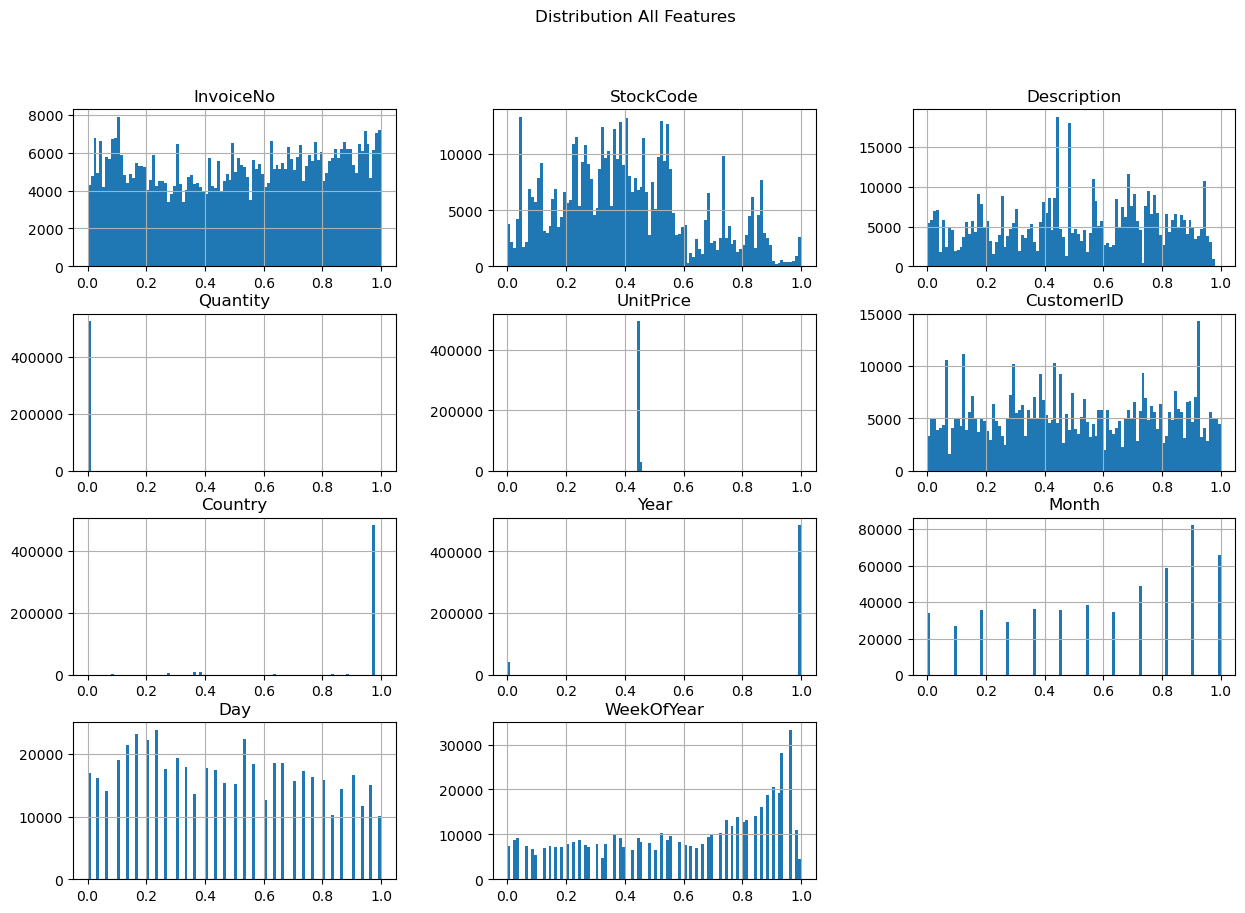

In [40]:
# Finalized data visualization
finalized_df.hist(bins=100, figsize=(15,10))
plt.suptitle('Distribution All Features')
plt.show()

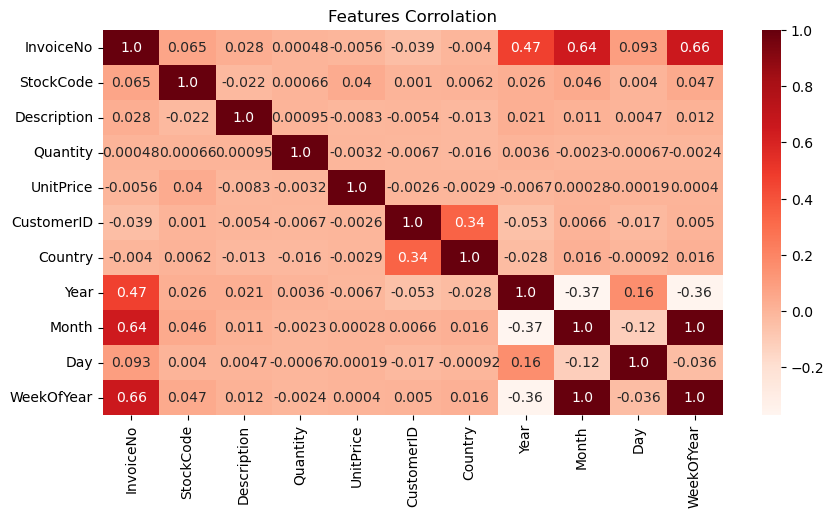

In [42]:
corr = finalized_df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds, fmt='0.2')
plt.title('Features Corrolation')
plt.show()

In [44]:
%%time
# Clustering and Evaluation 
wcss = [] # Within Cluster Sum of Square
si_score,ca_score,da_score = [],[],[] # silhouette_score,calinski_harabasz_score,davies_bouldin_score
k_value = [i for i in range (2,20)]

for k in range(2,20):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(finalized_df)
    labels = km.predict(finalized_df)

    # Evaluation
    si_score.append(silhouette_score(finalized_df,labels,sample_size=30000))
    ca_score.append(calinski_harabasz_score(finalized_df,labels))
    da_score.append(davies_bouldin_score(finalized_df,labels))
    wcss.append(km.inertia_)

CPU times: total: 5min 34s
Wall time: 1min 51s


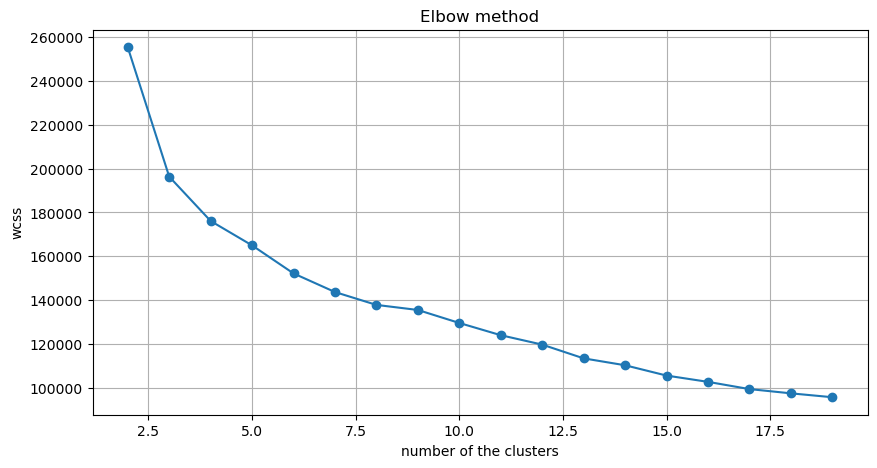

In [46]:
# Visualization

plt.figure(figsize=(10,5))
plt.plot(range(2,20),wcss,marker = 'o')
plt.xlabel('number of the clusters')
plt.ylabel('wcss')
plt.title('Elbow method')
plt.grid()
plt.show()

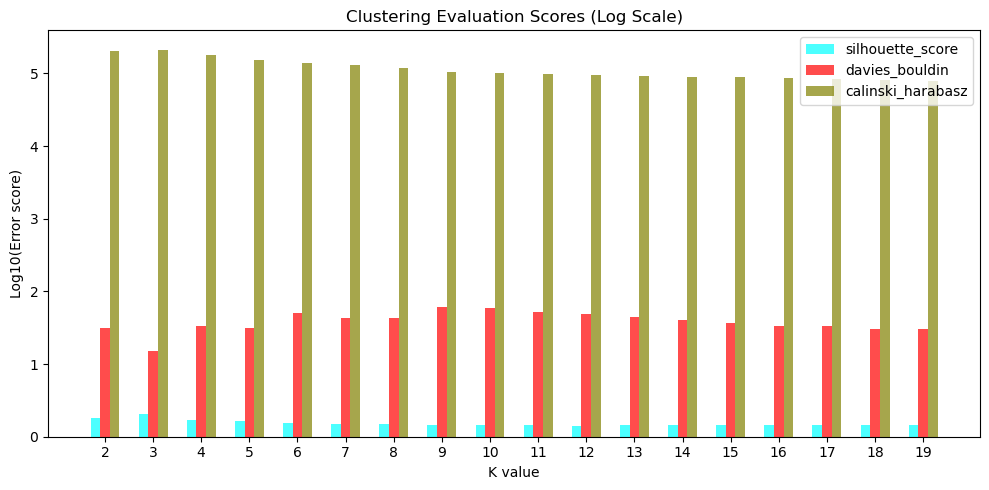

In [56]:
plt.figure(figsize=(10,5))
bar_width = 0.2
index = np.arange(len(k_value))
plt.bar(index,si_score ,bar_width,label = 'silhouette_score',color = 'cyan',alpha = 0.7)
plt.bar(index + bar_width ,da_score,bar_width,label = 'davies_bouldin',color = 'red',alpha = 0.7)
plt.bar(index + 2*bar_width ,np.log10(ca_score),bar_width,label = 'calinski_harabasz',color = 'olive',alpha = 0.7)

plt.xlabel('K value')
plt.ylabel('Log10(Error score)')
plt.title('Clustering Evaluation Scores (Log Scale)')
plt.xticks(index+bar_width,k_value)
plt.legend()
plt.tight_layout()
plt.show()

In [58]:
error_dic = {'k_value':k_value,
             'silhouette_score':si_score,
             'davies_bouldin':da_score,
             'calinski_harabasz(log10)':np.log10(ca_score),}

error_df = pd.DataFrame(error_dic)
error_df

,k_value,silhouette_score,davies_bouldin,calinski_harabasz(log10)
0,2,0.260229,1.499451,5.311689
1,3,0.313720,1.174552,5.326873
2,4,0.234963,1.526144,5.250073
3,5,0.214970,1.491973,5.179712
4,6,0.183865,1.705928,5.146085
5,7,0.177691,1.634461,5.109635
6,8,0.179039,1.640088,5.072676
7,9,0.154937,1.792237,5.026616
8,10,0.157803,1.766641,5.006455
9,11,0.155545,1.717399,4.990378


In [74]:
# silhouette_score == +1 cluster well separated. -1 cluster overlap
# davies_bouldin == Lower value indicates better clustering
# calinski_harabasz == Higher value indicates better clustering

print(f"Highest silhouette_score index : {error_df['silhouette_score'].idxmax()}")
print(f"Lowest davies_bouldin index : {error_df['davies_bouldin'].idxmin()}")
print(f"Highest calinski_harabasz(log10) index : {error_df['calinski_harabasz(log10)'].idxmax()}")

Highest silhouette_score index : 1
Lowest davies_bouldin index : 1
Highest calinski_harabasz(log10) index : 1


In [76]:
# k_value = 3
km = KMeans(n_clusters=3,random_state=42)
km.fit(finalized_df)
labels = km.predict(finalized_df)
finalized_df['K-mean-cluster'] = labels

C:\Users\admin\AppData\Local\Temp\ipykernel_2848\3545799208.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


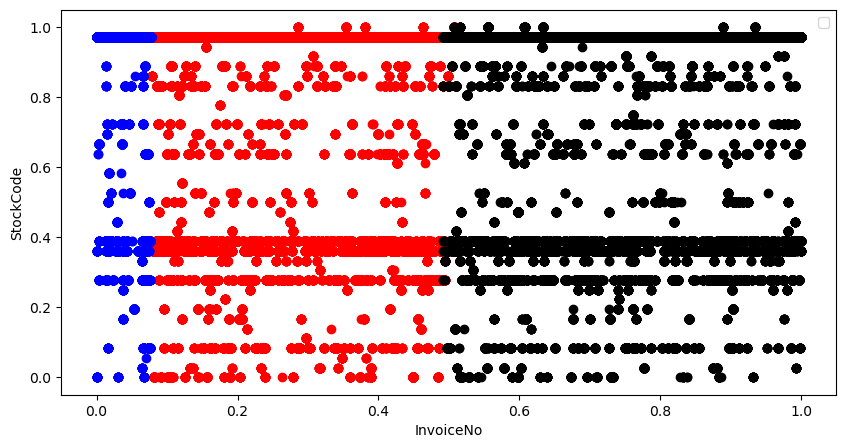

In [78]:
df_1 = finalized_df[finalized_df['K-mean-cluster'] == 0]
df_2 = finalized_df[finalized_df['K-mean-cluster'] == 1]
df_3 = finalized_df[finalized_df['K-mean-cluster'] == 2]

plt.figure(figsize=(10,5))
plt.scatter(df_1.InvoiceNo,df_1.Country,color = 'red')
plt.scatter(df_2.InvoiceNo,df_2.Country,color = 'black')
plt.scatter(df_3.InvoiceNo,df_3.Country,color = 'blue')


plt.xlabel('InvoiceNo')
plt.ylabel('StockCode')
plt.legend()

In [84]:
# Dimensionality Reduction
for i in range(1,6) :

    pca = PCA(n_components=i,random_state=42)
    pca_result = pca.fit_transform(finalized_df)
    explained_variance = pca.explained_variance_ratio_
    print(f'{i} component cover {np.sum(explained_variance):.4f}')

1 component cover 0.5460
2 component cover 0.6813
3 component cover 0.7640
4 component cover 0.8411
5 component cover 0.9113


In [86]:
# Lower PCA: Easier to visualize, less risk of overfitting, but potentially loss of important information.
# Higher PCA: Retains more information, but with a higher risk of overfitting and complexity.

the explained variance result : [0.54602037 0.13531421 0.08269236]


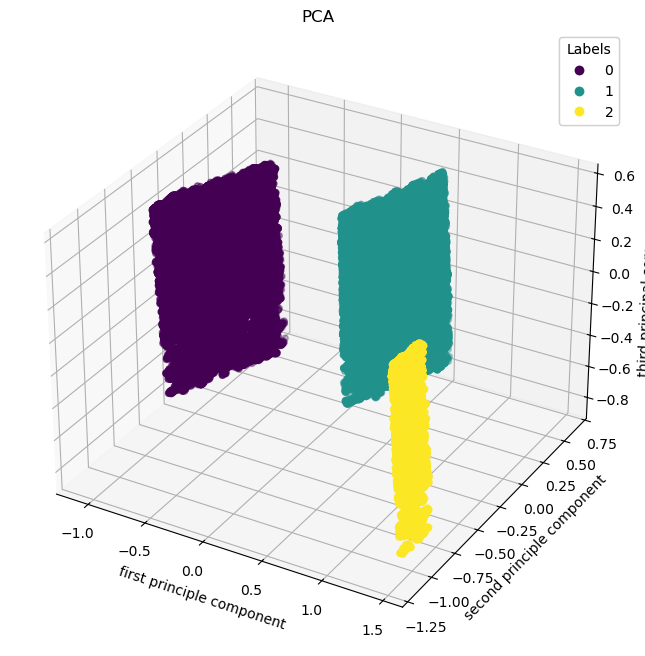

In [90]:
pca = PCA(n_components=3,random_state=42)
pca_result = pca.fit_transform(finalized_df)
print(f'the explained variance result : {pca.explained_variance_ratio_}')

plt.figure(figsize=(8,8))
ax = plt.axes(projection = '3d')

scatter = ax.scatter3D(pca_result[:,0],pca_result[:,1],pca_result[:,2],c=labels)
plt.xlabel('first principle component')
plt.ylabel('second principle component')
ax.set_zlabel('third principal component')
plt.title('PCA')
legend1 = ax.legend(*scatter.legend_elements(), title="Labels")
ax.add_artist(legend1)
plt.show()

In [98]:
%%time
sample_data = finalized_df.sample(100000)
sample_data.reset_index(drop=True, inplace=True)
sample_data

CPU times: total: 15.6 ms
Wall time: 17.9 ms


,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,WeekOfYear,K-mean-cluster
0,0.915634,0.590599,0.643839,0.000284,0.449666,0.975088,0.972222,1.0,0.909091,0.666667,0.92,1
1,0.947675,0.331312,0.480095,0.000099,0.449649,0.294563,0.972222,1.0,0.909091,0.900000,0.94,1
2,0.990520,0.167298,0.601185,0.001469,0.449647,0.387140,0.638889,1.0,1.000000,0.200000,0.96,1
3,0.374066,0.229467,0.442417,0.000000,0.449783,0.869382,0.972222,1.0,0.363636,0.533333,0.38,0
4,0.956016,0.549912,0.237678,0.000000,0.449666,0.743646,0.972222,1.0,0.909091,0.966667,0.94,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.048678,0.021986,0.552370,0.000000,0.449717,0.143410,0.972222,0.0,1.000000,0.400000,0.98,2
99996,0.042069,0.073288,0.610190,0.000062,0.449666,0.540145,0.972222,0.0,1.000000,0.266667,0.96,2
99997,0.747812,0.449078,0.755924,0.000136,0.449650,0.854907,0.972222,1.0,0.818182,0.300000,0.80,1
99998,0.193619,0.805155,0.969668,0.000012,0.449666,0.445885,0.972222,1.0,0.181818,0.100000,0.16,0


In [100]:
sample_data['K-mean-cluster'].nunique()

3